In [72]:
import numpy as np
import math as mt
import random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [124]:
l = 720
arr = np.zeros(l)
for i in range(0,l):
  arr[i] = rand.randint(0,3)


In [125]:
#max/min length -- these need to have (max-min) >= 2 for a single window
max_length = 20
min_length = 5

# density threshold
dt = 1.5
# initial window size
k = max_length
#max number of scores
score_max = 5
#number of window sizes
w = int(mt.floor(mt.log((max_length-min_length), 2)))

In [126]:

# x = np.arange(w)
# y = np.arange(len)
# X, Y = np.meshgrid(x,y)
# Z = np.zeros((y.shape[0], x.shape[0]))

X = np.zeros(w*l)
Y = np.zeros(w*l)
Z = np.zeros(w*l)

for i in range(w):
  X[i*l:i*l+l] = i+1
  Y[i*l:i*l+l] = np.arange(l)

dx = np.ones(w*l)
dy = np.ones(w*l)
dz = np.zeros(w*l)


In [127]:
for i in range(0,w):

    # reset number of scores for this window size
    score_count = 0
    #slide the window over everything, take scores over the threshold
    for j in range(0,arr.shape[0] - (k-1)):

      s = float(np.sum(arr[j:j+k]))

      d = float(s / k)
     
        
      #print(arr[j:j+k], " ", d, d>dt, " ", ((j+k+j)/2))
      if ((d > dt)):
          Z[i*l+int((j+k+j)/2)] += d
          #print(Z[int((j+k+j)/2),i], " ", d, " ", j, " ", j+k, " ", int((j+k+j)/2))
          score_count += 1

    # cut the window size in half
    k = int(mt.floor(k / 2))


In [128]:

#np.savetxt('result.csv',Z)

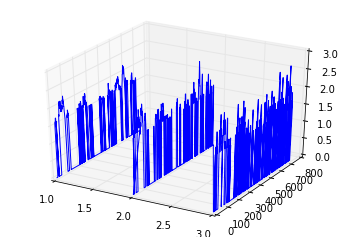

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
plt.show()  